In [2]:
!pip install -q python-dotenv langchain-openai

In [4]:
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
from langchain_openai import ChatOpenAI

query = '인프런에는 어떤 강의들이 있나요?'
llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='인프런은 다양한 분야의 온라인 강의를 제공하는 플랫폼으로, 주로 IT 및 프로그래밍 관련 강의가 많습니다. 다음은 인프런에서 찾아볼 수 있는 강의의 주제들입니다:\n\n1. **프로그래밍 언어**: Python, Java, JavaScript, C#, PHP 등.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등.\n3. **모바일 개발**: Android, iOS, Flutter 등.\n4. **데이터 사이언스**: 데이터 분석, 머신러닝, 딥러닝, R, TensorFlow 등.\n5. **DevOps**: Docker, Kubernetes, CI/CD, AWS, Azure 등.\n6. **UI/UX 디자인**: 디자인 원칙, 프로토타이핑, Figma, Adobe XD 등.\n7. **기타 기술**: 블록체인, 게임 개발, 사이버 보안 등.\n\n각 강의는 주로 영상 강의 형식으로 제공되며, 실습 문제와 자료도 포함될 수 있습니다. 사용자는 자신이 원하는 분야와 수준에 맞는 강의를 선택하여 학습할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 249, 'prompt_tokens': 18, 'total_tokens': 267, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmp

In [6]:
!pip install -q langgraph

In [25]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages : list[Annotated[AnyMessage, add_messages]]

In [26]:
from langgraph.graph import StateGraph

# Graph Builder 생성
graph_builder = StateGraph(AgentState)

In [27]:
def generate(state: AgentState) -> AgentState:
    """
    `generate` 노드는 사용자의 질문을 받아서 응답을 생성하는 노드입니다.
    """
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}


# 노드 삭제
graph_builder.nodes.clear()

# 노드 추가
graph_builder.add_node('generate', generate)

In [28]:
from langgraph.graph import START, END

# 엣지 삭제
graph_builder.edges.clear()

# 시작점 끝점 추가
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [29]:
graph = graph_builder.compile()

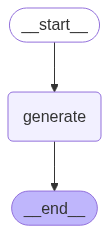

In [30]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
from langchain_core.messages import HumanMessage

initial_state = {'messages' : [HumanMessage(query)]}
answer = graph.invoke(initial_state)
answer.get('messages')


[AIMessage(content='인프런은 다양한 분야의 온라인 강의를 제공하는 플랫폼입니다. 주요 강의 내용은 다음과 같은 주제를 포함합니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, 등 다양한 언어에 대한 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등 웹 관련 기술.\n3. **앱 개발**: iOS, Android 개발 및 관련 프레임워크.\n4. **데이터 사이언스**: 데이터 분석, 머신러닝, 빅데이터 등.\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵, 일러스트레이터.\n6. **SEO 및 디지털 마케팅**: 검색 엔진 최적화, 소셜 미디어 마케팅.\n7. **클라우드 컴퓨팅**: AWS, Azure, Google Cloud 등 클라우드 관련 강의.\n8. **DevOps**: CI/CD, Docker, Kubernetes 등 자동화 및 운영 관련 강의.\n9. **경영 및 자기개발**: 리더십, 생산성 향상, 소통 기술 등.\n\n인프런에서는 강의 외에도 커뮤니티와 Q&A 섹션이 있어 학습자들이 서로 소통하고 도움을 받을 수 있습니다. 다양한 난이도와 형식의 강의가 있으니, 관심 있는 주제를 찾아보세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 299, 'prompt_tokens': 18, 'total_tokens': 317, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name